# Applying Machine Learning to Neutron Star Research

## An extension of my Graduate Thesis Research on 'The Heating and Cooling of Neutron Stars', Texas A&M University Commerce

Here I am attempting to use ML techniques I learned from skillshare (insert link here) to my research on neutron stars.

My main goal is to try and predict possible masses given a period and magnetic field (Bfields) of a neutron star (NS). I may have a hard time since the masses of most NSs are unknown/uncertain. However, I can still try to show the distribution of Bfields and periods of NSs in a better way and predict one parameter using the relationship with the other. 

I may try to use sample data from what NSs we do have the masses of and use ML on that. 

### Order of Operations
1. Collect data 
    - NS masses
    - Bfields: Australian Telescope National Facility (ATNF) pulsar catalog
    - periods(initial periods before spin down): ATNF pulsar catalog
2. Clean data. Most of the data I have is already somewhat sorted back from when I was doing research (dropna's, sort by Bfield ascending). However if I decide to add more parameters or redo the cleaning or add masses to it, I will have to clean it.
3. Join masses with Bfields and period data (if able to do so). join on names? not sure yet
4. Plot relationships on seaborn initially to find correlations, practice plotting mostly
5. Use ML techiques on distributions. Apply train-test to each as necessary
    - KNN
    - Decision Trees/RF
    - SVM/SVC
    - K-Cross validation
6. Try to plot results (this may be tough since I struggled in the course to plot things a) do to path errors and python not having visualization modules b) not knowing how to code it)

# 1. Collecting the Data

First, to collect the data and import it using pandas:

In [9]:
import pandas as pd

bvp = pd.read_csv('ATNFBvPextra.csv', names=['period', 'bsurf'], skiprows=1) #gets rid of header row from excel csv file
bvp.head()

,period,bsurf
0,0.693748,1.220000e+12
1,0.002634,4.500000e+07
2,0.003463,4.550000e+07
3,0.002978,6.800000e+07
4,0.002678,6.970000e+07


# 2. Cleaning the Data

As mentioned above, most of the data is clean of null values and sorted. Just need to convert values to log and make sure it all makes sense.

In [5]:
bvp.describe()
#just to get the analytics and make sure the count is the same

,period,bsurf
count,2072.000000,2.072000e+03
mean,0.773188,2.416620e+12
std,0.883161,9.516991e+12
min,0.001558,4.500000e+07
25%,0.269436,3.017500e+11
50%,0.529319,9.755000e+11
75%,0.962636,2.220000e+12
max,8.509827,2.600000e+14


In [8]:
#converting period and bsurf to log of values for consistency and clarity
import numpy as np
logbvp = bvp.apply(lambda x: np.log10(x))
logbvp.head()


,period,bsurf
0,-0.158798,12.086360
1,-2.579362,7.653213
2,-2.460535,7.658011
3,-2.526102,7.832509
4,-2.572202,7.843233


## Plotting Period and Bsurf (the better way!)

I have already created plots for these in my research, but now I want to improve those plots and make them more visually appealing and maybe show more analytics from them.

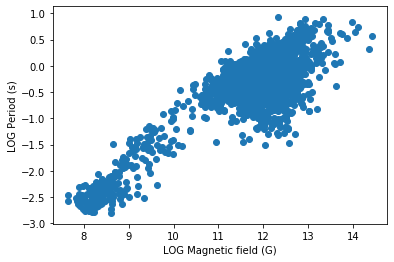

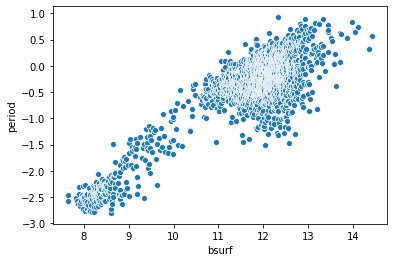

In [13]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

p = logbvp.period
b = logbvp.bsurf
#original plots using matplotlib
plt.scatter(b, p)
plt.xlabel('LOG Magnetic field (G)')
plt.ylabel('LOG Period (s)')
plt.show()
#new plots using seaborn
figure = plt.figure()
sns.scatterplot(x=b, y=p, data=logbvp)


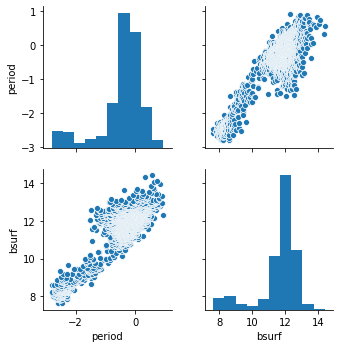

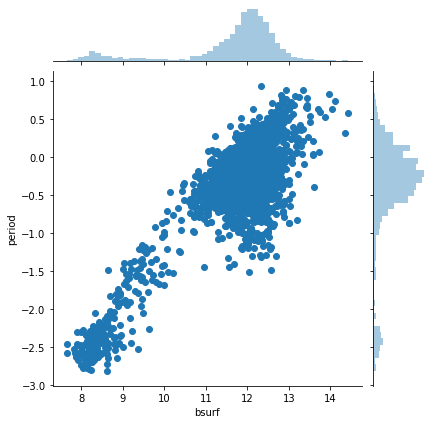

In [17]:
#using seaborn to create more plots
sns.pairplot(logbvp)
sns.jointplot(x=b, y=p, data=logbvp) #actually used this for my research
#great way to show distribution based on the two parameters

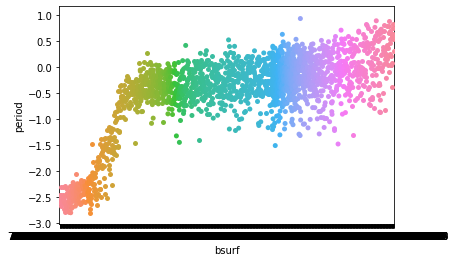

In [18]:
sns.swarmplot(x=b, y=p, data=logbvp)
#this one is a colorful graph showing the distribution in clusters by color and

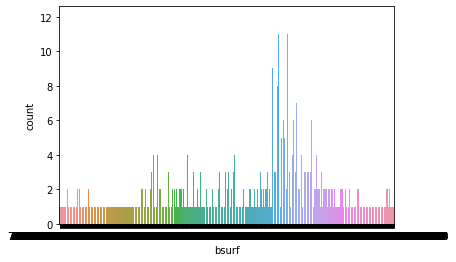

In [20]:
sns.countplot(x=b, data=logbvp)
#this one is a pretty graph showing the counts of NSs with certain bfields

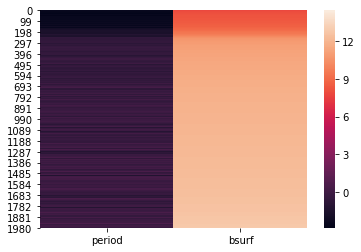

In [23]:
sns.heatmap(logbvp)
#this doesn't seem very helpful

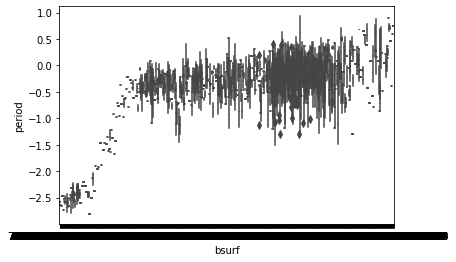

In [24]:
sns.boxplot(x=b, y=p, data=logbvp)
#also not helpful but wanted to see what kind of graph would be produced

### Discussion

It is shown through mathematical equations and physics that the magnetic field is directly correlated with the period (as period increases, bfield increases). These graphs also depict this relationship. Later I will prove correlation using ML techniques (linear regression, correlation and covariance). Based on popultion distribution, most NSs have a period between -1.0 and 0.5 (~0.1-3 s) and a magnetic field between 10 and 13 ($10^(10)$-$10^(13)$ G). There are a significant amount, however, that have lower Bfields ($10^8-10^9$ G) and faster periods (0.01-0.001 s) (millisecond pulsars).

Using this distribution in my research, I compared to other parameters and used Fortran to predict a distribution of theoretically-produced random NSs. In my research I studied two NSs in particular and compared other parameters such as accretion rate (for heating of one), atmospheric composition (for cooling of the other), equation of state (EOS) and other parameters to these to study the thermal evolution of NSs.